- 기존엔 Markdown 파일로만 글을 작성했는데, 코드와 함께 블로깅을 하고 싶은 생각에 방법을 찾아봤습니다
- 제 테마에 맞게 하나씩 삽질한 과정을 작성한 글입니다
- 이 글은 jupyter notebook(ipynb)에서 작성되었으며, 환경은 Mac OS입니다
- Jekyll 플러그인을 만들었다가, Github Page에선 안되는 것을 알고 뒤늦게 방법을 수정했습니다
    - [관련 공식 문서](https://jekyllrb-ko.github.io/docs/plugins/)
    - ```jupyter nbconverter```를 직접 하는 쉘 스크립트 생성

## 진행 과정
- 1) ```jupyter nbconverter``` 사용하기
- 2) ```_ipynbs``` 폴더에 ```*.ipynb``` 작성
- 3) 쉘 스크립트를 사용해 ```*.ipynb```을 ```*.html```으로 변환
- 4) Github Push

## 1) jupyter nbconverter 사용하기
- ```jupyter nbconverter```는 Jupyter Notebook 파일을 (ipynb) 다른 형태로 변환시켜줍니다
    - PDF, HTML, LaTex, Reveal.js HTML slideshow, Markdown, notebook 등..
- 저흰 여기서 HTML을 사용합니다! Markdown으로 변환해도 되긴 하는데, output의 이미지 주소를 연결하는 작업이 귀찮아서 HTML로 선택했습니다

### 설치
- nbconvert의 모든 기능을 사용하고 싶은 경우엔 Pandoc과 Tex도 설치해야 합니다!
- [nbconvert 공식 문서](http://nbconvert.readthedocs.io/en/latest/install.html)

```
// linux
sudo apt-get install pandoc
sudo apt-get install texlive-xetex

// mac
brew install pandoc
/usr/bin/ruby -e "$(curl -fsSL  https://raw.githubusercontent.com/Homebrew/install/master/install)"<code id="selectable"></code>
brew install caskroom/cask/brew-cask
brew cask install mactex

pip(3) install nbconveter
```

### 사용법
- ```jupyter nbconvert --to html your_ipynb_file.ipynb```
- 다른 Format이나 설정은 [nbconvert 공식 문서](http://nbconvert.readthedocs.io/en/latest/usage.html) 참고

## 2) ipynb 파일 작성
- ```_ipynbs``` 폴더를 만든 후, 쥬피터 노트북 파일을 작성해주세요
- 저는 ```2018-08-15-jupyter-notebook-in-jekyll.ipynb```로 만들었습니다!
- ```_posts``` 폴더에 ```2018-08-15-jupyter-notebook-in-jekyll.html``` 생성
    - 아래와 같은 정보 추가
    - 이 부분은 어떻게 자동화할지 고민해보기(jupyter notebook에서 아래 정보를 넣고 변환하면 깨짐)
    
```
---
layout: post
title:  "jupyter notebook(ipynb)로 jekyll 글쓰기"
subtitle: "jupyter notebook(ipynb)로 jekyll 글쓰기"
categories: development
tags: web
comments: true
---
```

## 3) 쉘 스크립트를 사용해 파일 변환
- 최상단 폴더에 ```ipython_to_html.sh``` 생성
- 사용 방법 :  ```bash ipython_to_html.sh {file_name}```
    - file_name은 2018-08-15-jupyter-notebook-in-jekyll 이런식으로! 
    - 지금은 아래와 같은 방식을 사용하시만 추후 ipynb 상관없이 대응하도록 수정할 예정
    - 현재는 >> (append)
    
```
#!/bin/bash/

file_name=$1
echo ${file_name}
function converter() {
    jupyter nbconvert --to html --template basic --stdout --TemplateExporter.exclude_input_prompt=True --HTMLExporter.anchor_link_text=' ' `pwd`/_ipynbs/${file_name}.ipynb >> `pwd`/_posts/${file_name}.html
    echo "Success"
}
converter
```

## 4) Github Push
- 위 스크립트로 \_posts에 파일이 변환!
- 그 파일을 push하면 끝!
- 단, 이 방법은 직접 쉘 스크립트를 실행해줘야 하는 단점이 있음.. 더 자동화할 예정인데 아이디어 있는 분은 댓글을 남겨주세요 :)

---

## Test (##)
### Test (###)
#### Test (####)
- 여기부턴 어떻게 ipynb 파일이 변하는지 테스트하기 위해 작성했습니다
    - 목차1
    - 목차2
        - 세부 목차1

## Markdown Table
| Process | Max needs | Current needs |
|:-------:|:---------:|:-------------:|
|    P0   |    10     |       5       |
|    P1   |     4     |       2       |
|    P2   |     9     |       2       |

## Image
- img src="" 사용
<img src="https://www.google.co.kr/logos/doodles/2018/national-liberation-day-of-korea-2018-5697243024719872-law.gif?raw=1">

## Code 부분
- 디테일한 format은 추후 수정 예정!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
# 걍 주석

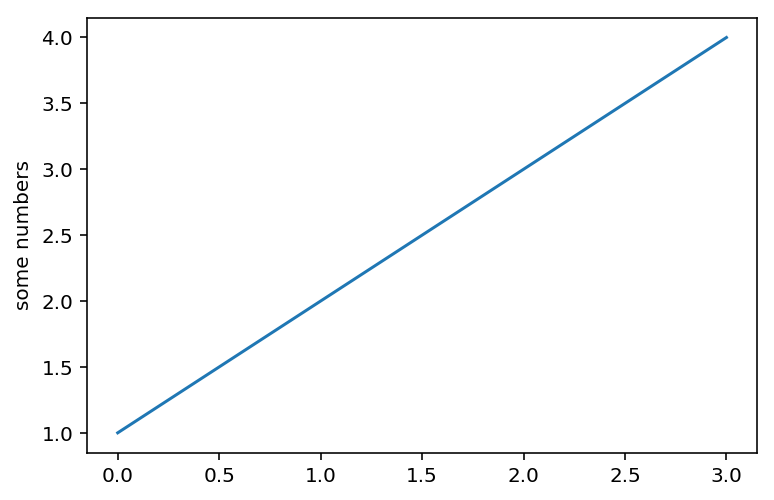

In [13]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [14]:
print("convert html test")

convert html test


In [22]:
def test_function(n):
    print("len : {}, ".format(len(n)), "word is " + n)

In [23]:
test_function("oh")

len : 2,  word is oh
